# **HW 1**

1. CNN 모형에서 mnist데이터의  pixel 의 size 가 maxpooling 에 의해 줄어들 때, channel 수를 maxpooling 의 kernel size 만큼 증가시켜 원래 모형과 비교하라.

In [33]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
(x_train,y_train),(x_test,y_test)=mnist.load_data()
num_labels=len(np.unique(y_train))
y_train=to_categorical(y_train)  # y를 범주화 
y_test=to_categorical(y_test)
shape1=x_train.shape[1]   
shape2=x_train.shape[2]
x_train=x_train.reshape(-1, shape1, shape2,1).astype('float32')   # 28*28 채널 1(흑백)이미지로 reshape(3d tensor) 
x_test=x_test.reshape(-1, shape1, shape2,1).astype('float32')
x_train=x_train/255
x_test=x_test/255

In [38]:
input_shape = (shape1, shape2, 1)   # 28*28의 흑백 이미지
batch_size = 64  
kernel_size = 3  # 3*3 커널 사용
pool_size = 2   # pooling stride = pooling size
filters = 64  # 노드의 숫자! 
dropout = 0.3

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, activation='relu', input_shape= input_shape))  # ((3*3)*1 + 1)64
model.add(MaxPooling2D(2))   # stride 2로 pooling (모수없음)

model.add(Conv2D(filters = 32, kernel_size = 3, activation='relu', padding='same'))   # ((3*3)*64+1 )64 =  36928    
model.add(MaxPooling2D(2))   # stride 2로 pooling

model.add(Conv2D(filters=32, kernel_size = 3, activation='relu'))  # ((3*3)*64 +1) 64 = 36928
model.add(Flatten()) # MLP layer 입력을 위함
model.add(Dropout(0.3))  # 0.7만큼만 학습에 사용

model.add(Dense(num_labels, activation='softmax'))   
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten_14 (Flatten)         (None, 512)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)             

In [39]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64) 

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.5600 - accuracy: 0.8213
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0831 - accuracy: 0.9753
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0573 - accuracy: 0.9823
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0461 - accuracy: 0.9858
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0382 - accuracy: 0.9880
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0354 - accuracy: 0.9887
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0319 - accuracy: 0.9901
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0262 - accuracy: 0.9912
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0243 - accuracy: 0.9919
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0208 - accuracy: 0.9932

In [44]:
input_shape = (shape1, shape2, 1)   # 28*28의 흑백 이미지
batch_size = 64  
kernel_size = 3  # 3*3 커널 사용
pool_size = 2   # pooling stride
filters = 64  # 노드의 숫자! 
dropout = 0.3

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, activation='relu', input_shape= input_shape))  # ((3*3)*1 + 1)64
model.add(MaxPooling2D(2))   # stride 2로 pooling (모수없음)
model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu', padding='same'))   # ((3*3)*64+1 )64 =  36928    
model.add(MaxPooling2D(2))   # stride 2로 pooling
model.add(Conv2D(filters= 128, kernel_size = 3, activation='relu'))  # ((3*3)*64 +1) 64 = 36928
model.add(Flatten()) # MLP layer 입력을 위함
model.add(Dropout(0.3))  # 0.7만큼만 학습에 사용

model.add(Dense(num_labels, activation='softmax'))   
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_17 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 2048)            

In [45]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64) 

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.3977 - accuracy: 0.8813
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0539 - accuracy: 0.9833
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0356 - accuracy: 0.9890
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0238 - accuracy: 0.9923
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0191 - accuracy: 0.9933
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0161 - accuracy: 0.9945
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0141 - accuracy: 0.9957
Epoch 9/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0120 - accuracy: 0.9958
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0098 - accuracy: 0.9968

2. 


(1) Boston-housing 데이터를 tensorflow dataset API 에서 내려받아, traing data 와 test data 를 구성하라.

(2) Boston-housing 데이터를 그림 4-1 아키텍쳐에 적용한 후, 모형의 최적화를 callbacks 로 구현하라.

In [ ]:
from tensorflow.keras.datasets import boston_housing
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()
x_train1, x_train2 = x_train[:,:8], x_train[:, 5:]  # 각각 feature를 8개씩 구성
x_test1, x_test2 = x_test[:, :8], x_test[:, 5:]
print(x_train1.shape, x_train2.shape, x_test1.shape, x_test2.shape)

(404, 8) (404, 8) (102, 8) (102, 8)


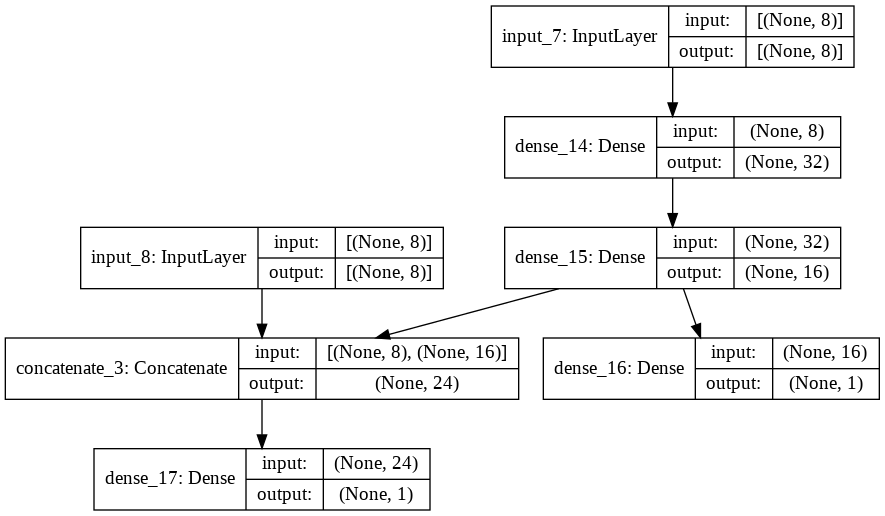

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
# Functional API
input_a = Input(shape=[8])
input_b = Input(shape=[8])
h1 = Dense(32, activation='relu')(input_a)
h2 = Dense(16, activation='relu')(h1)
concat = concatenate([input_b, h2])
out1 = Dense(1)(h2)
out2 = Dense(1)(concat)
model = Model(inputs=[input_a, input_b], outputs=[out1, out2])
plot_model(model, show_shapes=True)

In [ ]:
# callbacks 적용
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
callback_list = [EarlyStopping(monitor='loss', patience=2),   # acc대신 loss로 설정
                 ModelCheckpoint(filepath='model_ch5', monitor='val_loss', save_best_only='True')]
model.compile(loss=['mse', 'mse'], loss_weights=[0.2, 0.8], optimizer='RMSprop')
history=model.fit([x_train1,x_train2],[y_train,y_train],epochs=10, batch_size=32, callbacks=callback_list, validation_data=([x_test1,x_test2],[y_test,y_test]))

Epoch 1/10
13/13 [==============================] - 1s 21ms/step - loss: 3468.3783 - dense_16_loss: 242.0333 - dense_17_loss: 4274.9647 - val_loss: 2069.3738 - val_dense_16_loss: 259.6879 - val_dense_17_loss: 2521.7949
INFO:tensorflow:Assets written to: model_ch5/assets
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 1467.7191 - dense_16_loss: 230.3634 - dense_17_loss: 1777.0579 - val_loss: 1082.1239 - val_dense_16_loss: 202.9388 - val_dense_17_loss: 1301.9200
INFO:tensorflow:Assets written to: model_ch5/assets
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 747.7208 - dense_16_loss: 156.2287 - dense_17_loss: 895.5938 - val_loss: 653.9953 - val_dense_16_loss: 170.3191 - val_dense_17_loss: 774.9144
INFO:tensorflow:Assets written to: model_ch5/assets
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 456.6283 - dense_16_loss: 136.6047 - dense_17_loss: 536.6343 - val_loss: 500.3323 - val_dense_16_loss: 157.0715 - val_den